In [1]:
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
import datetime
import time
import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('reddit_clean.csv')

In [6]:
list(df.columns.values)

['Unnamed: 0',
 'Unnamed: 0.1',
 'index',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_text',
 'contest_mode',
 'created',
 'created_utc',
 'distinguished',
 'domain',
 'downs',
 'edited',
 'gilded',
 'id',
 'is_self',
 'link_flair_css_class',
 'link_flair_text',
 'locked',
 'media',
 'media_embed',
 'name',
 'num_comments',
 'over_18',
 'permalink',
 'post_hint',
 'preview',
 'score',
 'secure_media',
 'secure_media_embed',
 'selftext',
 'spoiler',
 'suggested_sort',
 'timestamp',
 'title',
 'ups',
 'url',
 'whitelist_status',
 'TIME',
 'POLARITY']

In [13]:
df_1 = df[['id','title','selftext','author','num_comments','score','TIME','POLARITY','domain','link_flair_text']]
df_1.to_csv('df_csv.csv')

In [27]:
df['domain'] == 'tacobell.com'

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
242546    True
242547    True
242548    True
242549    True
242550    True
242551    True
242552    True
242553    True
242554    True
242555    True
242556    True
242557    True
242558    True
242559    True
242560    True
242561    True
242562    True
242563    True
242564    True
242565    True
242566    True
242567    True
242568    True
242569    True
242570    True
242571    True
242572    True
242573    True
242574    True
242575    True
Name: domain, Length: 242576, dtype: bool

In [22]:
df.domain.unique()

array(['charlotteobserver.com', 'self.Charlotte', 'imgur.com',
       'charlotte.craigslist.org', 'i.imgur.com', 'm.imgur.com',
       'clclt.com', 'charlotteagenda.com', 'wcnc.com', 'facebook.com',
       'bleacherreport.com', 'wsoctv.com', 'news.yahoo.com',
       'lakenormanmike.com', 'youtube.com', 'reddit.com', 'photojambo.com',
       'panthers.fancam.com', 'therantisdue.com', 'mobile.twitter.com',
       'usnwc.org', 'clture.org', 'wfae.org', 'en.m.wikipedia.org',
       'charlottestories.com', 'wbtv.com', 'bizjournals.com',
       'parkroadbooks.com', 'youtu.be', 'goqnotes.com', 'sites.google.com',
       'charlottefive.com', 'twitter.com', 'fox46charlotte.com',
       'soundcloud.com', 'classaction.org', 'americanwx.com',
       'survey.k12insight.com', 'scorebig.com', 'ncsbe.gov',
       'wccbcharlotte.com', 'gizmodo.com', 'meckdecday.org',
       'newsobserver.com', 'myfox8.com', 'thinkprogress.org', '1065.com',
       'onboardinformatics.com', 'plancharlotte.org', 'krimesha

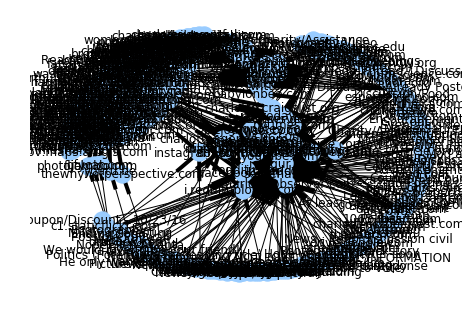

In [34]:
%matplotlib inline 

dg = nx.DiGraph()

GREEN = "#77DD77"
BLUE = "#99CCFF"

subset_g = df_1[[ 'link_flair_text', 'domain']]
tuples = [tuple(x) for x in subset_g.values]

#tuples is list containing followers/follwoing pairs
dg.add_edges_from(tuples, color = 'red')
# print('directed edges:', dg.edges())
nx.draw(dg, node_color=BLUE, with_labels=True)

import warnings
warnings.filterwarnings("ignore")

In [66]:
df_csv = pd.read_csv('df_csv.csv',encoding = "ISO-8859-1")

In [48]:
df_csv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,43lk9m,John Isner brings charity tennis event to Char...,1,NaN,tothelimit2019,1,0,5,2/1/16 7:26,0.000000,charlotteobserver.com,273,News,489
1,43lbpu,Bernie Sanders' NC HQ is now in the same build...,1,They just moved in from a temporary location. ...,JangusKhan,8,41,84,2/1/16 6:32,0.316667,self.Charlotte,5007,Discussion,3839
2,43l7u1,Brewery Meetup - Wooden Robot Brewing - Tuesda...,1,Hello all! Big news this week! We are adding [...,Baelzabub,93,4,14,2/1/16 6:09,0.078125,self.Charlotte,5007,Meetup,137
3,43kvqm,ISP recommendation for University City,1,What is the best deal for internet connection ...,cltsu,2,4,0,2/1/16 4:56,1.000000,self.Charlotte,5007,Discussion,3839
4,43jj16,MUST SEE show at Children's Theatre!,1,"Just saw ""The Miraculous Journey of Edward Tul...",wadkins75,1,0,8,1/31/16 23:51,0.298214,self.Charlotte,5007,Discussion,3839
5,43ik03,Free IKEA PAX Wardrobe,1,I am moving today and have an IKEA PAX wardrob...,granite603,27,3,14,1/31/16 17:53,0.216429,self.Charlotte,5007,Discussion,3839
6,43h8kk,Watercolor Charlotte skyline,1,"My technique is not great, but here's some lov...",teekay2,2,9,55,1/31/16 10:20,0.200000,self.Charlotte,5007,Discussion,3839
7,43g3ab,anyone play pool? 8BALL IS MY FAVORITE,1,Looking for friends that play 8ball,northlake42,1,3,1,1/31/16 5:36,0.000000,self.Charlotte,5007,NaN,0
8,43f60n,Gun shots ring out in the north lake mall area...,1,NaN,solidrok,4,16,4,1/31/16 2:12,0.000000,imgur.com,181,News,489
9,43ens5,Any of you guys use coworking spaces?,1,"Hey guys,\r\rDo any of you use Charlotte Cowor...",ThinkerToy,1,9,6,1/31/16 0:15,0.000000,self.Charlotte,5007,Discussion,3839


In [57]:
df.domain.unique()

array(['charlotteobserver.com', 'self.Charlotte', 'imgur.com',
       'charlotte.craigslist.org', 'i.imgur.com', 'm.imgur.com',
       'clclt.com', 'charlotteagenda.com', 'wcnc.com', 'facebook.com',
       'bleacherreport.com', 'wsoctv.com', 'news.yahoo.com',
       'lakenormanmike.com', 'youtube.com', 'reddit.com', 'photojambo.com',
       'panthers.fancam.com', 'therantisdue.com', 'mobile.twitter.com',
       'usnwc.org', 'clture.org', 'wfae.org', 'en.m.wikipedia.org',
       'charlottestories.com', 'wbtv.com', 'bizjournals.com',
       'parkroadbooks.com', 'youtu.be', 'goqnotes.com', 'sites.google.com',
       'charlottefive.com', 'twitter.com', 'fox46charlotte.com',
       'soundcloud.com', 'classaction.org', 'americanwx.com',
       'survey.k12insight.com', 'scorebig.com', 'ncsbe.gov',
       'wccbcharlotte.com', 'gizmodo.com', 'meckdecday.org',
       'newsobserver.com', 'myfox8.com', 'thinkprogress.org', '1065.com',
       'onboardinformatics.com', 'plancharlotte.org', 'krimesha

In [75]:
user_flair = pd.read_csv('user-flair.csv',encoding = "ISO-8859-1")

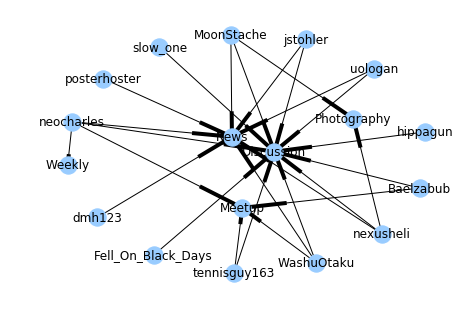

In [84]:
%matplotlib inline 

dg = nx.DiGraph()

GREEN = "#77DD77"
BLUE = "#99CCFF"

subset_g = user_flair[['target', 'source']]
tuples = [tuple(x) for x in subset_g.values]

#tuples is list containing followers/follwoing pairs
dg.add_edges_from(tuples, color = 'red')
# print('directed edges:', dg.edges())
nx.draw(dg, node_color=BLUE, with_labels=True)
nx.transitivity(dg)
import warnings
warnings.filterwarnings("ignore")

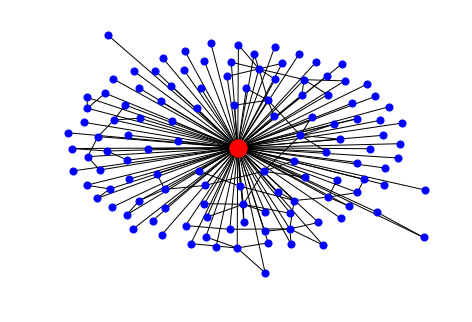

In [86]:
#sample for reference - ego network
__author__="""Drew Conway (drew.conway@nyu.edu)"""

from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt


if __name__ == '__main__':
    # Create a BA model graph
    n=1000
    m=2
    G=nx.generators.barabasi_albert_graph(n,m)
    # find node with largest degree
    node_and_degree=G.degree()
    (largest_hub,degree)=sorted(node_and_degree.items(),key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego=nx.ego_graph(G,largest_hub)
    # Draw graph
    pos=nx.spring_layout(hub_ego)
    nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego,pos,nodelist=[largest_hub],node_size=300,node_color='r')
    plt.savefig('ego_graph.png')
    plt.show()

In [94]:
#supporting six degrees of seperation

paths = nx.Graph()

user_flair = pd.read_csv('user-flair.csv',encoding = "ISO-8859-1")
subset_g = user_flair[['target', 'source']]
tuples = [tuple(x) for x in subset_g.values]
paths.add_edges_from(tuples)

# Display average shortest path details
print('Avg shortest path from spankmylion to jstohler is', nx.shortest_path_length(paths, 'spankmylion','jstohler'), 'hops:')
print(nx.shortest_path(paths, 'spankmylion','jstohler'))

Avg shortest path from spankmylion to jstohler is 4 hops:
['spankmylion', 'TWC/RR Discussion', 'nexusheli', 'News', 'jstohler']


In [98]:
g = nx.Graph()
dg = nx.DiGraph(g)
g.add_edges_from(tuples)
# print('degrees:', g.degree())
nx.degree_centrality(g)

{'News': 0.0709549071618037,
 'tothelimit2019': 0.0003315649867374005,
 'Discussion': 0.6863395225464191,
 'JangusKhan': 0.001326259946949602,
 'Meetup': 0.011936339522546418,
 'Baelzabub': 0.000663129973474801,
 'cltsu': 0.0003315649867374005,
 'wadkins75': 0.0003315649867374005,
 'granite603': 0.0003315649867374005,
 'teekay2': 0.0003315649867374005,
 nan: 0.28746684350132623,
 'northlake42': 0.0003315649867374005,
 'solidrok': 0.000663129973474801,
 'ThinkerToy': 0.0003315649867374005,
 'grindyopepper': 0.0003315649867374005,
 'sirbunsthe2nd': 0.0003315649867374005,
 'carolinaslim': 0.0003315649867374005,
 'WEEKLY': 0.0009946949602122016,
 'AutoModerator': 0.000663129973474801,
 'Lost & Found': 0.008289124668435012,
 'nygmattyp': 0.0003315649867374005,
 'Charlotte142857': 0.000663129973474801,
 'saltylife11': 0.000663129973474801,
 'kevinsorboisagod': 0.0003315649867374005,
 'justWonderingzz': 0.0003315649867374005,
 'JokerAirWick': 0.0003315649867374005,
 'obrien3': 0.0003315649867

In [99]:
print(nx.betweenness_centrality(g)) #normalized
print(nx.betweenness_centrality(g, normalized = False))

{'News': 0.05898901966995162, 'tothelimit2019': 0.0, 'Discussion': 0.8198677890173269, 'JangusKhan': 0.0021741919487740322, 'Meetup': 0.004528181456439552, 'Baelzabub': 0.00012607052137706892, 'cltsu': 0.0, 'wadkins75': 0.0, 'granite603': 0.0, 'teekay2': 0.0, nan: 0.35234404860671426, 'northlake42': 0.0, 'solidrok': 0.00015756015219520918, 'ThinkerToy': 0.0, 'grindyopepper': 0.0, 'sirbunsthe2nd': 0.0, 'carolinaslim': 0.0, 'WEEKLY': 0.0012974608420699468, 'AutoModerator': 0.0006488336390549465, 'Lost & Found': 0.006643347640050512, 'nygmattyp': 0.0, 'Charlotte142857': 0.00037578445139160415, 'saltylife11': 0.0008020457545433788, 'kevinsorboisagod': 0.0, 'justWonderingzz': 0.0, 'JokerAirWick': 0.0, 'obrien3': 0.0, 'Photography': 0.02799994551952944, 'ravenclawroxy': 0.0, 'petruchi41': 0.0, 'cjleather7169': 0.0, 'inhospitableUterus': 0.00037578445139160415, 'qwerty25801': 0.0, 'yokramer': 0.0, 'ClayMitchell': 0.00028130344642429646, 'speedylenny': 0.002704187727252174, 'Supaspin': 0.0, 'T

{'News': 268200.6566117954, 'tothelimit2019': 0.0, 'Discussion': 3727627.286901959, 'JangusKhan': 9885.22459813499, 'Meetup': 20587.920373477198, 'Baelzabub': 573.1947539034092, 'cltsu': 0.0, 'wadkins75': 0.0, 'granite603': 0.0, 'teekay2': 0.0, nan: 1601974.4982762593, 'northlake42': 0.0, 'solidrok': 716.366139173782, 'ThinkerToy': 0.0, 'grindyopepper': 0.0, 'sirbunsthe2nd': 0.0, 'carolinaslim': 0.0, 'WEEKLY': 5899.061413772062, 'AutoModerator': 2950.000000000001, 'Lost & Found': 30204.777247206457, 'nygmattyp': 0.0, 'Charlotte142857': 1708.5491023860952, 'saltylife11': 3646.5972685220167, 'kevinsorboisagod': 0.0, 'justWonderingzz': 0.0, 'JokerAirWick': 0.0, 'obrien3': 0.0, 'Photography': 127305.11229800295, 'ravenclawroxy': 0.0, 'petruchi41': 0.0, 'cjleather7169': 0.0, 'inhospitableUterus': 1708.5491023860952, 'qwerty25801': 0.0, 'yokramer': 0.0, 'ClayMitchell': 1278.9798755816348, 'speedylenny': 12294.91400447928, 'Supaspin': 0.0, 'TWC/RR Discussion': 20820.73348916935, 'spankmylion'

In [100]:
print(nx.closeness_centrality(g))

{'News': 0.34267752932221285, 'tothelimit2019': 0.2538151250060624, 'Discussion': 0.6188171586088653, 'JangusKhan': 0.45600139956869323, 'Meetup': 0.32464592557555266, 'Baelzabub': 0.38012122986689906, 'cltsu': 0.3791230123514923, 'wadkins75': 0.3791230123514923, 'granite603': 0.3791230123514923, 'teekay2': 0.3791230123514923, nan: 0.40840181924596397, 'northlake42': 0.28816375868951755, 'solidrok': 0.2959008876889696, 'ThinkerToy': 0.3791230123514923, 'grindyopepper': 0.3791230123514923, 'sirbunsthe2nd': 0.3791230123514923, 'carolinaslim': 0.3791230123514923, 'WEEKLY': 0.31570094708823154, 'AutoModerator': 0.23874655714147225, 'Lost & Found': 0.3191203428458184, 'nygmattyp': 0.2406568479804105, 'Charlotte142857': 0.3915650748669603, 'saltylife11': 0.44961084741030294, 'kevinsorboisagod': 0.28816375868951755, 'justWonderingzz': 0.3791230123514923, 'JokerAirWick': 0.3791230123514923, 'obrien3': 0.3791230123514923, 'Photography': 0.329611970555818, 'ravenclawroxy': 0.24657565004858797, '